### ML Model Selection Strategies with Python: Predicting Bank Lead Conversion

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

#### 1. Load the dataset

In [8]:
data = pd.read_csv('../data/loan_lead_data.csv')
data.head(1)

,Gender,Age,Employment Type,Credit Score,Source of Lead,Loan Period,Value of Collateral,Monthly Income,Bank Account Type,Existing EMI,Loan Amount,Estimated EMI,New Debt to Income ratio,Loan Approved
0,Male,64,Self Employed,637,Call,5,9398,136924,Savings,19786,85449,17390.03116,0.271509,0


In [7]:
data.columns

Index(['Gender', 'Age', 'Employment Type', 'Credit Score', 'Source of Lead',
       'Loan Period', 'Value of Collateral', 'Monthly Income',
       'Bank Account Type', 'Existing EMI', 'Loan Amount', 'Estimated EMI',
       'New Debt to Income ratio', 'Loan Approved'],
      dtype='object')

In [11]:
data.size

70000

### 2. Initialize Data and Conduct Train-Test Split


*2.1 Prepare the data for analysis by performing the following actions:*

- Differentiate the dataset into predictor variables and the target variable

- Handle the non-numerical attributes by creating dummy variables

- Implement a 60:40 train-test split using a random state of 42

### - Separate the predictor variables from the target variable

In [14]:
X = data.drop('Loan Approved', axis=1) 
y = data['Loan Approved']
#Transform non-numerical attributes using the pd.get_dummies method
X = pd.get_dummies(X)
# Divide the dataset into training and testing subsets using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 3. Address Class Imbalance using Visualization and SMOTE

**Here:** 
- Will find the class counts in the target variable and visualize the potential imbalance using a bar chart. If the visual confirms an imbalance in the target variable of the training set, utilize the Synthetic Minority Over-sampling Technique (SMOTE) to equalize the class distribution. Confirm class balance in the new data using another bar chart visualization.

- SMOTE: It is especially helpful in situations where the dataset has many more instances of the majority class compared to the minority class, leading to biased models.

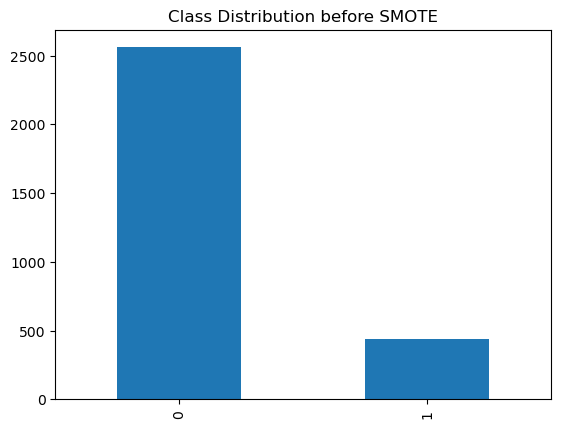

In [16]:

y_train.value_counts().plot(kind='bar', title='Class Distribution before SMOTE')
plt.show()

In [ ]:

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts().plot(kind='bar', title='Class Distribution after SMOTE')
plt.show()